In [157]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

plt.style.use('seaborn-white')

In [30]:
def load_hist(file):
    file = np.load(file, allow_pickle = True).all()
    return pd.DataFrame.from_dict(file)

In [31]:
hist_1_5 = load_hist("modelHistEpoch1_5.npy")
hist_6 = load_hist("modelHistEpoch6.npy")
hist_7_11 = load_hist("modelHistEpoch7_11.npy")
hist_12_19 = load_hist("modelHistEpoch12_19.npy")
hist_20_21 = load_hist("modelHistEpoch20_21.npy")
hist_22_26 = load_hist("modelHistEpoch22_26.npy")

In [35]:
model_hist = pd.concat([hist_1_5, hist_6, hist_7_11, hist_12_19, hist_20_21, hist_22_26])

In [36]:
model_hist.reset_index(drop=True, inplace=True)

In [37]:
model_hist

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.562693,0.68801,0.496648,0.73015
1,0.426045,0.79393,0.413058,0.81050
2,0.349648,0.84004,0.334078,0.83885
3,0.300171,0.86614,0.294037,0.87380
4,0.258992,0.88749,0.258632,0.87940
5,0.228003,0.90365,0.226304,0.90365
6,0.207716,0.91359,0.204010,0.91675
7,0.185940,0.92328,0.206457,0.92380
8,0.172288,0.92853,0.176705,0.92885
9,0.158728,0.93530,0.178454,0.92325


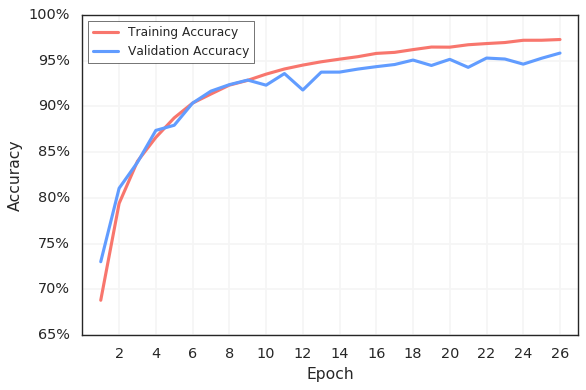

In [180]:
fig, ax = plt.subplots(1, 1, figsize = (8,5))
plt.grid(color = '#F5F5F5',
         which = "major")
plt.plot(np.arange(1, 27), model_hist['binary_accuracy'] * 100, c = "#F8766D", label = "Training Accuracy")
plt.plot(np.arange(1, 27), model_hist['val_binary_accuracy'] * 100, c = "#619CFF", label = "Validation Accuracy")
plt.xlabel("Epoch",
           fontsize = 14)
plt.ylabel("Accuracy",
           fontsize = 14)
plt.xlim((0, 27))
plt.xticks(np.arange(2, 27, 2),
           fontsize = 13)
plt.yticks(fontsize = 13)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
ax.legend(loc = 'best', 
          fontsize = 11,
          facecolor = 'white',
          edgecolor = 'black',
          frameon = True)
plt.savefig("accuracy_plot.png", dpi = 400, bbox_inches = 'tight')

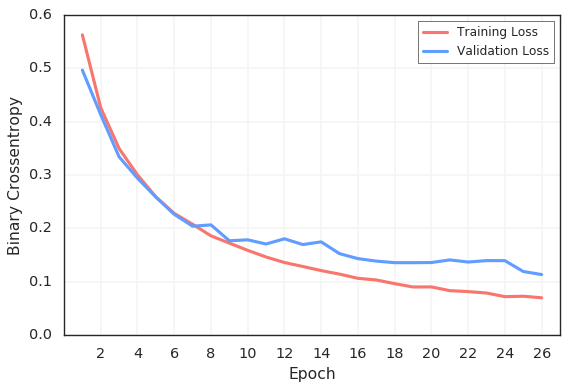

In [181]:
fig, ax = plt.subplots(1, 1, figsize = (8,5))
plt.grid(color = '#F5F5F5',
         which = "major")
plt.plot(np.arange(1, 27), model_hist['loss'],  c = "#F8766D", label = "Training Loss")
plt.plot(np.arange(1, 27), model_hist['val_loss'], c = "#619CFF", label = "Validation Loss")
plt.xlabel("Epoch",
           fontsize = 14)
plt.ylabel("Binary Crossentropy",
           fontsize = 14)
plt.xlim((0, 27))
plt.xticks(np.arange(2, 27, 2),
           fontsize = 13)
plt.yticks(fontsize = 13)
ax.legend(loc = 'best', 
          fontsize = 11,
          facecolor = 'white',
          edgecolor = 'black',
          frameon = True)
plt.savefig("loss_plot.png", dpi = 400, bbox_inches = 'tight')

In [182]:
model_hist.to_csv("acc_loss_history.csv", index = False)